In [1]:
import numpy as np
import pandas as pd
import nltk

In [2]:
#nltk.download_shell()

In [3]:
messages = [line.rstrip() for line in open('SMSSpamCollection')]

In [4]:
print(len(messages))
(messages[0])

5574


'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [5]:
for num,message in enumerate(messages[:10]):
    print(num, message)
    print('***************************************')
       

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
***************************************
1 ham	Ok lar... Joking wif u oni...
***************************************
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
***************************************
3 ham	U dun say so early hor... U c already then say...
***************************************
4 ham	Nah I don't think he goes to usf, he lives around here though
***************************************
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv
***************************************
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
***************************************
7 ham	As per your request 'Melle Melle 

In [6]:
messages = pd.read_csv('SMSSpamCollection', sep = '\t', names = ['Label', 'Message'])

In [7]:
messages.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
messages.groupby('Label').describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [10]:
messages['Length'] = messages.Message.apply(len)

In [11]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

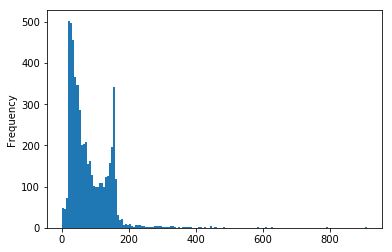

In [13]:
# visualising the length of the messages and their frequency
messages.Length.plot.hist(bins = 150)

In [14]:
messages.Length.describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: Length, dtype: float64

In [15]:
# displaying the longest message
#aliter
#messages[messgaes['Length'] == 910]
messages[messages.Length == 910]

,Label,Message,Length
1085,ham,For me the love should start with attraction.i...,910


In [16]:
# displaying the shortest message
messages[messages['Length'] == 2]

,Label,Message,Length
1925,ham,Ok,2
3051,ham,Ok,2
4498,ham,Ok,2
5357,ham,Ok,2


In [17]:
# to print out the entire longest message
messages[messages.Length == 910]['Message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F78BE1F160>,
      dtype=object)

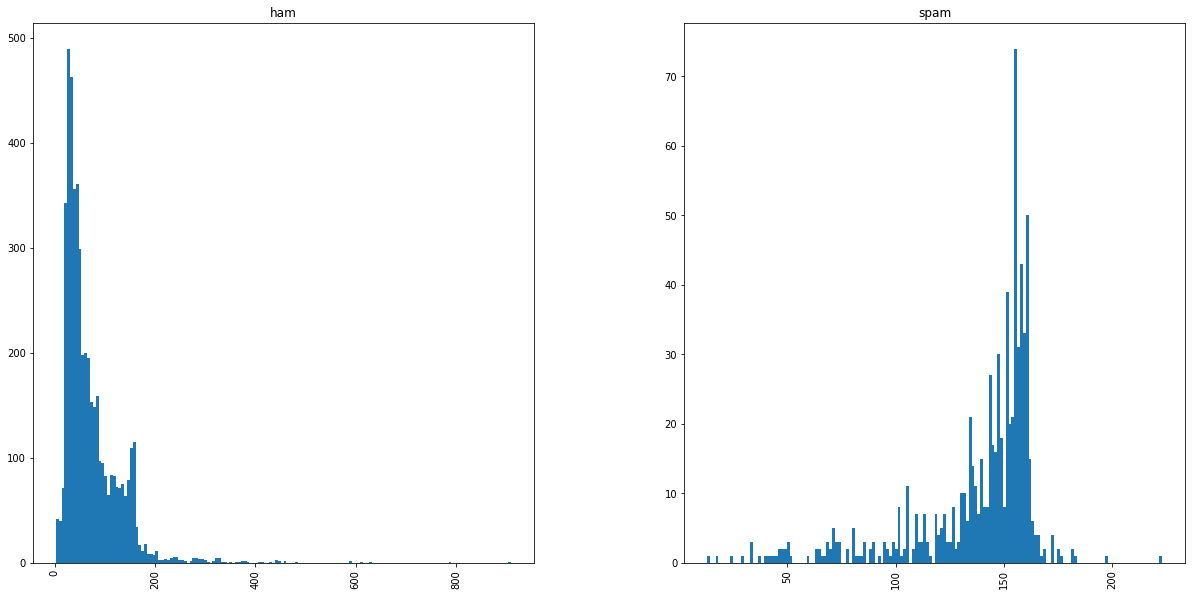

In [18]:
# length of the message is ploted on the x-axis which clearly shows that
# length of spam messages is more than the length of the ham messages
# in this spam messages are in range 0-50(mostly) and spam messages are in range
# 120-180
plt.figure(figsize = (50, 25))
messages.hist(column = 'Length', by = 'Label', bins = 160, figsize = (20, 10))

In [19]:
nltk.download('stopwords')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>


False

In [20]:
# step 1 is removing punctuation
#example
import string
mess = 'Sample message!, Notice: School is there Ahead. can you please drive slow or i have to call the cpos'
nopunc = [ c for c in mess if c not in string.punctuation]

In [21]:
print(nopunc)

['S', 'a', 'm', 'p', 'l', 'e', ' ', 'm', 'e', 's', 's', 'a', 'g', 'e', ' ', 'N', 'o', 't', 'i', 'c', 'e', ' ', 'S', 'c', 'h', 'o', 'o', 'l', ' ', 'i', 's', ' ', 't', 'h', 'e', 'r', 'e', ' ', 'A', 'h', 'e', 'a', 'd', ' ', 'c', 'a', 'n', ' ', 'y', 'o', 'u', ' ', 'p', 'l', 'e', 'a', 's', 'e', ' ', 'd', 'r', 'i', 'v', 'e', ' ', 's', 'l', 'o', 'w', ' ', 'o', 'r', ' ', 'i', ' ', 'h', 'a', 'v', 'e', ' ', 't', 'o', ' ', 'c', 'a', 'l', 'l', ' ', 't', 'h', 'e', ' ', 'c', 'p', 'o', 's']


In [22]:
# step 2 remove the stopwords
from nltk.corpus import stopwords
stopwords.words('english')
nopunc = ''.join(nopunc)
print(nopunc)
print(nopunc.split())

Sample message Notice School is there Ahead can you please drive slow or i have to call the cpos
['Sample', 'message', 'Notice', 'School', 'is', 'there', 'Ahead', 'can', 'you', 'please', 'drive', 'slow', 'or', 'i', 'have', 'to', 'call', 'the', 'cpos']


In [44]:
# erasing the non important words (stopwords) from our peice of string
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
print(clean_mess)

['Sample', 'message', 'Notice', 'School', 'Ahead', 'please', 'drive', 'slow', 'call', 'cpos']


In [62]:
# what we actually did in a nutshell by defining a function

def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clear text
    """
    
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [63]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [64]:
messages['Message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

In [65]:
from sklearn.feature_extraction.text import CountVectorizer
bow_transformer = CountVectorizer(analyzer = text_process).fit(messages['Message'])

In [66]:
print(len(bow_transformer.vocabulary_))

11425


In [50]:
mess4 = messages['Message'][3]
print(mess4)

U dun say so early hor... U c already then say...


In [51]:
bow4 = bow_transformer.transform([mess4])

In [52]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [53]:
print(bow4.shape)

(1, 11425)


In [56]:
print(bow_transformer.get_feature_names()[4068])
print(bow_transformer.get_feature_names()[9554])

U
say


In [67]:
 messages_bow = bow_transformer.transform(messages['Message'])

In [68]:
print('shape of sparse matrix is', messages_bow.shape)

shape of sparse matrix is (5572, 11425)


In [70]:
messages_bow.nnz  # nnz stands for no. of non zeros

50548

In [71]:
from sklearn.feature_extraction.text import TfidfTransformer

In [73]:
tfidf_transformer = TfidfTransformer()
tfidf_transformer.fit(messages_bow)

TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)

In [74]:
tfidf4 = tfidf_transformer.transform(bow4)

In [76]:
print(tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [77]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

In [79]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

In [80]:
from sklearn.naive_bayes import MultinomialNB

In [81]:
spam_detect_model = MultinomialNB()
spam_detect_model.fit(messages_tfidf, messages['Label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [85]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [86]:
messages.Label[3]

'ham'

In [87]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [89]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
msg_train, msg_test, label_train, label_test = train_test_split(messages.Message, messages.Label, test_size = 0.3)

In [92]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer = text_process)),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])

In [93]:
pipeline.fit(msg_train, label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000001F78DF72B70>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [94]:
predictions = pipeline.predict(msg_test)

In [95]:
from sklearn.metrics import classification_report

In [96]:
print(classification_report(label_test, predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1443
       spam       1.00      0.66      0.80       229

avg / total       0.96      0.95      0.95      1672

